# จุดเสี่ยงอันตรายบนถนน

## โจทย์

จากข้อมูลอุบัติเหตุในกรุงเทพมหานครในปี 2019 ให้วิเคราะห์จุดเสี่ยงอันตรายบนถนนและแสดงลงบนแผนที่โดยใช้ jupyter notebook โดยให้ส่งคำตอบเป็น link ที่ให้อาจารย์ไปเปิดดูได้

ให้นิสิตเลือกเทคนิคที่เคยเรียนมาที่เหมาะสมเอง โดยให้นิสิตระวังหน่วยเมื่อนิสิตต้องมีการกำหนดตัวแปรที่เกี่ยวข้องกับระยะทาง (ข้อมูลที่ให้เป็น lat lon)


### ข้อกำหนด

* นิสิตสามารถ submit หลายครั้งได้ แต่ไม่สามารถ submit หลังหมดเวลาได้
* นิสิตสามารถเปิดเอกสารใด ๆ ก็ได้ แต่ห้ามติดต่อกันทุกรูปแบบ และห้ามใช้ social network ทุกชนิด (ให้ปิดโปรแกรม social network ให้หมด) หากจับได้จะได้ 0 ทันที
* นิสิตห้ามลอกข้อความจากเว็บไซต์หรือแหล่งข้อมูลอื่น ๆ หากพบจะให้คะแนนทั้งหมดเป็น 0 ทันที

### ขอความร่วมมือ

เมื่อนิสิตส่งคำตอบเรียบร้อยแล้วให้นิสิตประเมินผลรายวิชาใน https://www.cas.chula.ac.th/cas/? ด้วย (ไม่ต้อง submit ภายใน 3 ชั่วโมง)


In [6]:
#ศรัณย์ สวยสุขวิชา 6030823821
#Saran Suaysukwicha 6030823821
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/Maplub/accident_sample_bkk/main/event2019_BKK.csv')

In [7]:
data

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [8]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.title)

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.Circle(
      location = [lat, lng],
      radius = 1,
      color = 'red' 
     ).add_to(station_map)
station_map

In [13]:
acc_point = np.array( data[["latitude","longitude"]].values.tolist() )
acc_point

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

In [59]:
from sklearn.cluster import AgglomerativeClustering as Agg
model = Agg(distance_threshold=1, n_clusters=None).fit(acc_point)
model = Agg(n_clusters=9).fit(acc_point)
model

AgglomerativeClustering(n_clusters=9)

In [60]:
agg_label = model.labels_

In [72]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

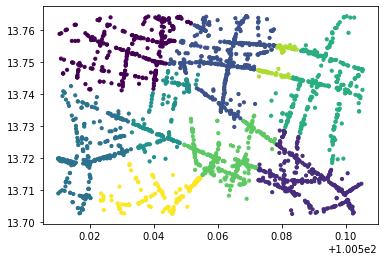

In [73]:
plt.scatter(data["longitude"] , data["latitude"], c=agg_label ,s=10)
plt.show()

In [49]:
##### ลองทำ K-mean #######
from sklearn.cluster import KMeans
n_clusters=9
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(acc_point)

KMeans(n_clusters=9)

In [68]:
kmeans_labels = kmeans.labels_
SS = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.
SS

0.25775225582703615

(100.5, 100.615)

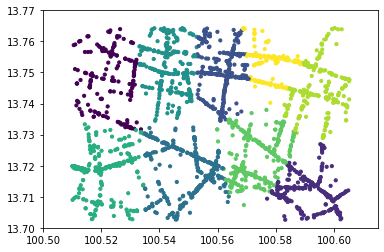

In [69]:
plt.scatter(data["longitude"] , data["latitude"], c=kmeans_labels, cmap='viridis',s=10)
plt.ylim(13.7,13.77)
plt.xlim(100.5,100.615)

In [87]:
KL=list(kmeans_labels)

In [86]:
np.savetxt("foo.csv", KL, delimiter=",")

In [95]:
import cv2 as cv
img = cv.imread("Desktop/Clustered.jpg",cv.IMREAD_COLOR)
cv.imshow("My Clustering MAP",img)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [84]:
import matplotlib.cm as cm
import matplotlib.colors as colors
longitude =  100.5538272857666
latitude = 13.734465925243732
map_clusters = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = KL
colors_array = cm.rainbow(np.linspace(0, 1, len(KL)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color=rainbow.KL,
        fill=True,
        fill_color=rainbow.KL,
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

AttributeError: 'list' object has no attribute 'KL'